# Results analisys

This Notebook has the intention to compares the metrics of a DRL Policy and a RB Policy applied both to a Building Control in EnergyPlus model.

## Importing the evaluation result files

First you need to import the files produced by `init_conventional.py` `init_evaluation.py`. The first is the RB Policy applied to the evaluation case, while the second one is the DRL Policy applied to the same scenario.

In [35]:
# Import the necesaty libraries
import pandas as pd

# Replace 'ppo_file_path' and 'rb_file_path' with the actual paths to your CSV files
drl_file_path = "C:/Users/grhen/Documents/ray_results/proposed_test/VN_P1_0.5_DQN.csv"
rb_file_path = "C:/Users/grhen/Documents/ray_results/conventional_test/VN_P1_0.5_RB.csv"

# Read CSV files into pandas DataFrames
drl_data = pd.read_csv(drl_file_path, header=None)
rb_data = pd.read_csv(rb_file_path, header=None)

# Function to clean and format the data
def clean_and_format(data: pd.DataFrame):
    # Remove empty rows
    data = data.dropna(how='all')

    # Add the specified header
    header = ["To", "Ti", "v", "d", "RHo", "RHi", "dh", "dc", "opening_window_1", "opening_window_2",
              'hora', 'simulation_day', 'volumen', 'window_area_relation_north',
              'window_area_relation_west', 'window_area_relation_south', 'window_area_relation_east',
              'construction_config', 'internal_mass', 'latitud', 'longitud', 'altitud', 'beta', 'E_max',
              "rad", "reward", "terminated", "truncated", 'energy', 'comfort', 'ppd']

    data.columns = header

    return data

# Apply cleaning and formatting to both DataFrames
drl_data_cleaned = clean_and_format(drl_data)
rb_data_cleaned = clean_and_format(rb_data)

# Now 'ppo_data_cleaned' and 'rb_data_cleaned' contain the cleaned and formatted data


You can analyse the general results obtained in both files with the `describe` method of pandas for DataFrame types.

In [36]:
# General results of the RB Policy
rb_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,latitud,longitud,altitud,beta,E_max,rad,reward,energy,comfort,ppd
count,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,...,5.255900e+04,5.255900e+04,52559.0,52559.0,5.255900e+04,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000
mean,15.700613,19.202340,4.277578,200.929007,54.465559,61.641038,117.150726,22.764299,0.091288,0.091288,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,230.135543,-0.362388,0.000039,-3.989588,72.468199
std,7.840545,3.530916,2.306554,96.529655,18.629588,20.151808,124.729639,79.934363,0.288021,0.288021,...,7.105495e-15,4.263297e-14,0.0,0.0,1.110234e-16,328.916315,0.175918,0.000036,3.172116,35.181516
min,-4.400000,11.084123,0.100000,0.000000,16.000000,16.569308,0.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.500279,0.000000,-11.407116,5.000000
25%,9.933333,16.088788,2.533333,151.000000,39.000000,46.526158,0.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.500000,0.000000,-6.981619,43.136545
50%,15.800000,19.443336,4.000000,211.833333,54.000000,59.134855,0.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.477909,0.000069,-2.616820,95.565229
75%,21.300000,22.090550,5.700000,262.000000,68.666667,75.421107,250.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,466.000000,-0.215710,0.000069,-1.355135,100.000000
max,37.700000,27.671220,14.800000,359.833333,100.000000,100.000000,250.000000,927.654290,1.000000,1.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,1092.000000,-0.025000,0.000258,0.582736,100.000000


In [37]:
# General results of the DRL Policy
drl_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,opening_window_1,opening_window_2,...,latitud,longitud,altitud,beta,E_max,rad,reward,energy,comfort,ppd
count,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000,...,5.255900e+04,5.255900e+04,52559.0,52559.0,5.255900e+04,52559.000000,52559.000000,52559.000000,52559.000000,52559.000000
mean,15.700613,18.482518,4.277578,200.929007,54.465559,45.315753,133.054268,28.256714,0.184383,0.000247,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,230.135543,-0.382759,0.000045,-4.368340,76.540948
std,7.840545,4.415940,2.306554,96.529655,18.629588,12.269848,123.867235,78.434453,0.387800,0.015725,...,7.105495e-15,4.263297e-14,0.0,0.0,1.110234e-16,328.916315,0.168135,0.000033,3.445288,33.624853
min,-4.400000,2.303552,0.100000,0.000000,16.000000,14.901206,0.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.500083,0.000000,-13.769400,5.000000
25%,9.933333,15.104325,2.533333,151.000000,39.000000,36.664350,0.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.500083,0.000000,-7.582628,55.397160
50%,15.800000,18.507817,4.000000,211.833333,54.000000,44.070792,250.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,0.000000,-0.493868,0.000069,-2.928815,98.756961
75%,21.300000,21.979086,5.700000,262.000000,68.666667,52.013350,250.000000,0.000000,0.000000,0.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,466.000000,-0.277043,0.000069,-1.582587,100.000000
max,37.700000,32.409751,14.800000,359.833333,100.000000,97.899880,250.000000,250.000000,1.000000,1.000000,...,-3.298500e+01,-6.893000e+01,1043.0,0.5,4.166667e-01,1092.000000,-0.025039,0.000069,1.418724,100.000000


## Graphs

Some metrics are better whe we can see how they change in time. In this part graphs are created to a more detailed view of the results.

In [38]:
import matplotlib.pyplot as plt

def line_plot(
    drl_data_cleaned: pd.DataFrame,
    rb_data_cleaned: pd.DataFrame,
    column_name:str
    ):
    """Plot a line chart

    Args:
        ppo_data_cleaned (pd.DataFrame): The metrics of the DRL Policy to be ploted.
        rb_data_cleaned (pd.DataFrame): The metrics of the RB Policy to be ploted.
        column_name (str): The ID name of the column in the DataFrames evaluated.
    """
    # Plotting PPO results
    plt.plot(drl_data_cleaned[column_name], label='DRL')

    # Plotting RB results
    plt.plot(rb_data_cleaned[column_name], label='RB')

    # Adding labels and title
    plt.xlabel('Time Steps')
    plt.ylabel(column_name)
    plt.title(f'Comparison of {column_name} between DRL and RB policies')
    plt.legend()

    # Display the plot
    plt.show()


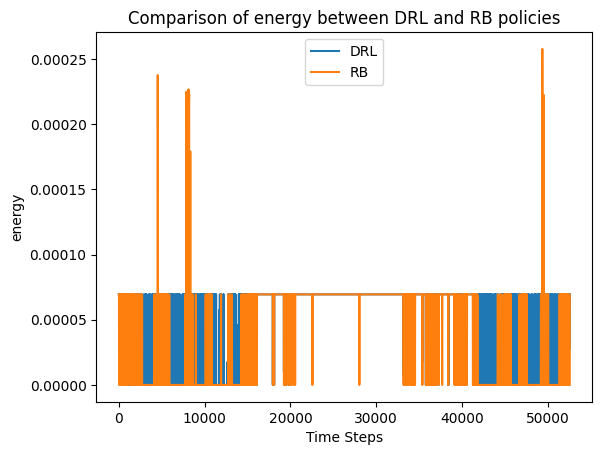

In [39]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'energy'

line_plot(
    drl_data_cleaned=drl_data_cleaned,
    rb_data_cleaned=rb_data_cleaned,
    column_name=column_name
    )

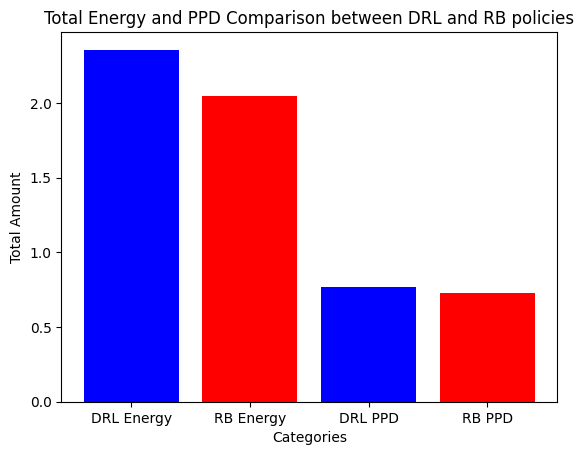

In [40]:
# Define the columns representing 'energy' and 'comfort'
energy_column = 'energy'
ppd_column = 'ppd'

# Calculate total energy and comfort for each DataFrame
drl_total_energy = drl_data_cleaned[energy_column].sum()
drl_total_ppd = drl_data_cleaned[ppd_column].mean()/100

rb_total_energy = rb_data_cleaned[energy_column].sum()
rb_total_ppd = rb_data_cleaned[ppd_column].mean()/100

# Create a bar graph
categories = ['DRL Energy', 'RB Energy', 'DRL PPD', 'RB PPD']
values = [drl_total_energy, rb_total_energy, drl_total_ppd, rb_total_ppd]

plt.bar(categories, values, color=['blue', 'red', 'blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

In [41]:
drl_energy_rate_increment = (drl_total_energy-rb_total_energy)/rb_total_energy
drl_comfort_rate_increment = (drl_total_ppd-rb_total_ppd)/rb_total_ppd

print('The Energy Rate Increment of DRL Policy is: ' + str(round(drl_energy_rate_increment*100, 2))+'%\n')
print('The PPD Rate Increment of DRL Policy is: ' + str(round(drl_comfort_rate_increment*100, 2))+'%')

The Energy Rate Increment of DRL Policy is: 15.29%

The PPD Rate Increment of DRL Policy is: 5.62%


## Análisis de políticas

En este apartado analizaremos las políticas seguidas por el agente DRL y las compararemos con las del RB.
Para ello, caracterizaremos algunas métricas generales que contemplen el año entero y luego nos enfocaremos en el estudio de algunas semanas características para observar el comportamiento de cada política.

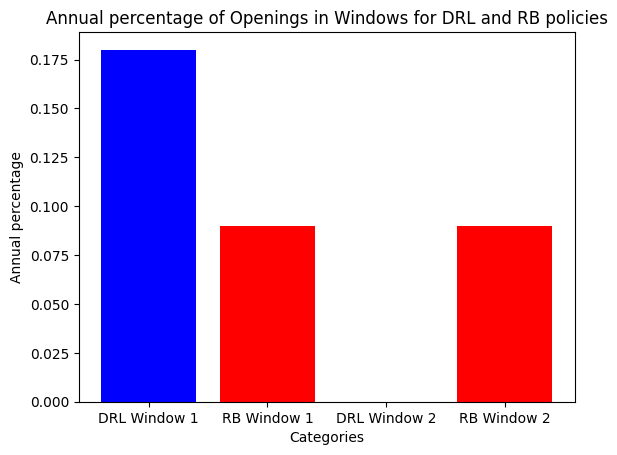

In [42]:
# Define the columns representing 'energy' and 'comfort'
metrics = [
    round(drl_data_cleaned.describe()['opening_window_1']['mean'],2),
    round(drl_data_cleaned.describe()['opening_window_2']['mean'],2),
    round(rb_data_cleaned.describe()['opening_window_1']['mean'],2),
    round(rb_data_cleaned.describe()['opening_window_2']['mean'],2)
]

# Create a bar graph
categories = ['DRL Window 1', 'RB Window 1', 'DRL Window 2', 'RB Window 2']
values = [metrics[0], metrics[2], metrics[1], metrics[3]]

plt.bar(categories, values, color=['blue', 'red', 'blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Annual percentage')
plt.title('Annual percentage of Openings in Windows for DRL and RB policies')
plt.show()

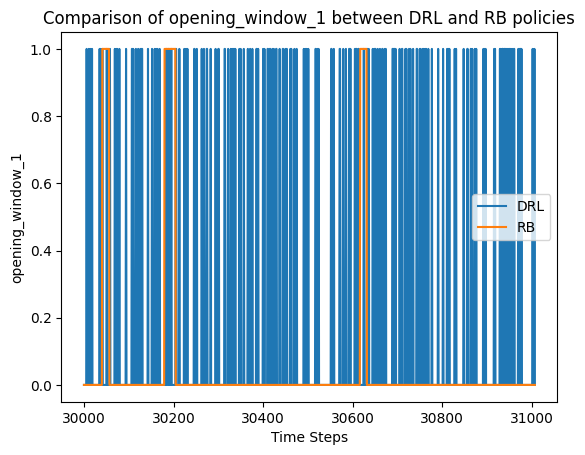

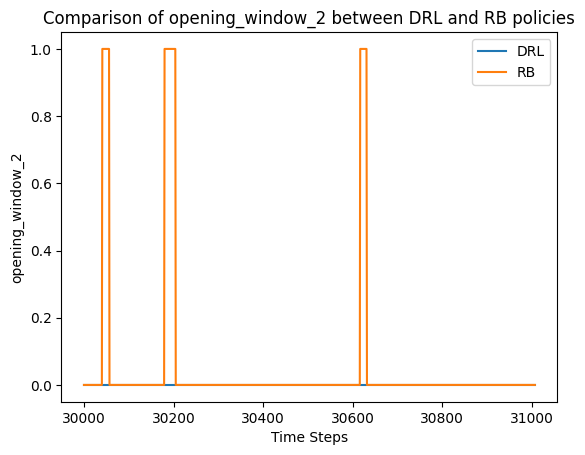

In [43]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[30000:31008],
    rb_data_cleaned=rb_data_cleaned.iloc[30000:31008],
    column_name=column_name
    )

# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_2'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[30000:31008],
    rb_data_cleaned=rb_data_cleaned.iloc[30000:31008],
    column_name=column_name
    )

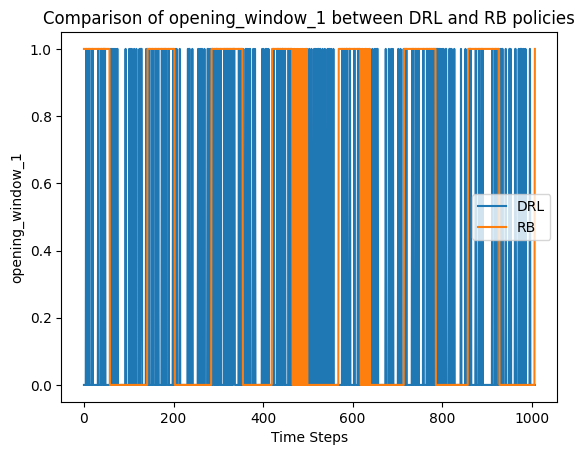

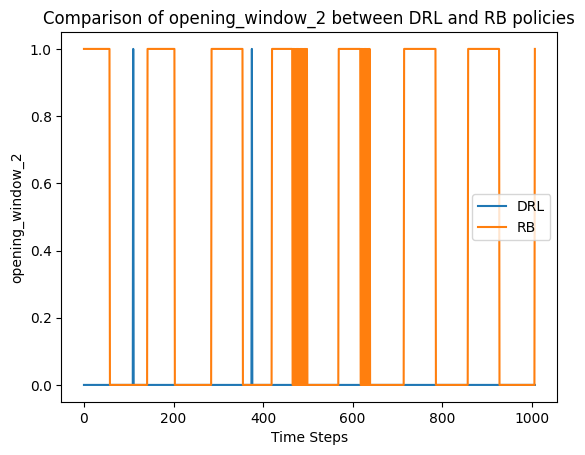

In [44]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[:1008],
    rb_data_cleaned=rb_data_cleaned.iloc[:1008],
    column_name=column_name
    )

# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_2'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[:1008],
    rb_data_cleaned=rb_data_cleaned.iloc[:1008],
    column_name=column_name
    )